# Preprare configs

This notebook supports the process of preparing config files.
The goals of the notebooks are as follows:
- extracting selected frame(s) from the video
- setting ant testing unwrapping parameters (camera view -> bird's eye view)

In [1]:
import sys
#sys.path.insert(0,'../..')
sys.path.insert(0,'..')

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pathlib 

import pickle
from moveoverlib.functions import *

%matplotlib inline

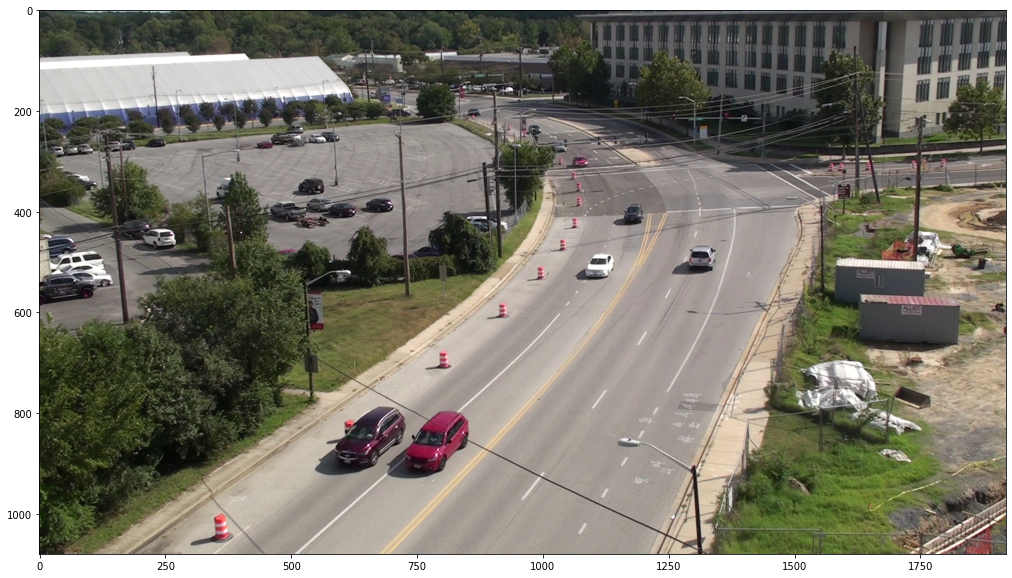

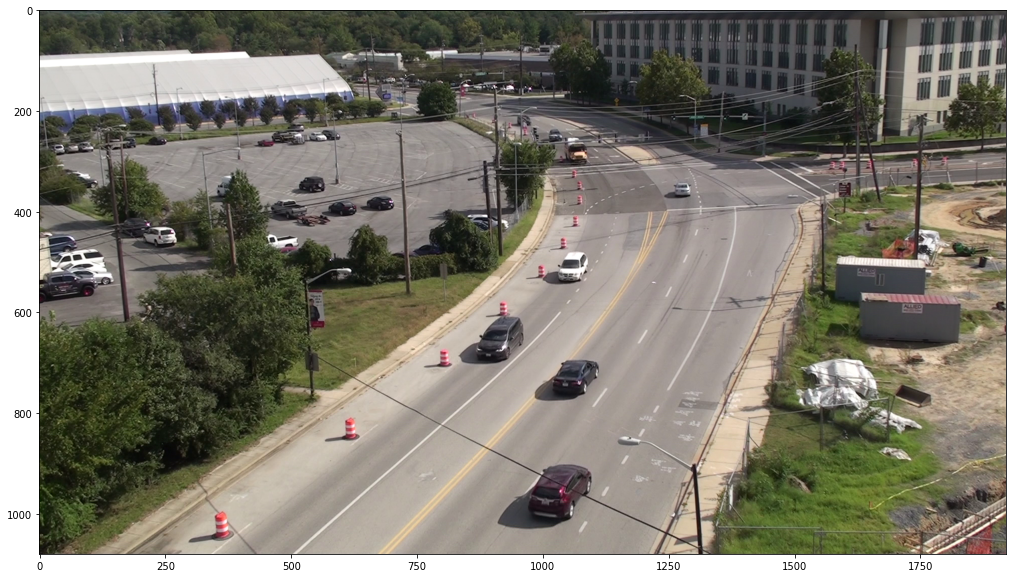

In [2]:
VIDEO_FILE = '/data/MoveOver/Videos/SpeedTest20210930/Speed Testing 9-30-21.mp4'

# Create folder for images
pathlib.Path('./images/').mkdir(parents=True, exist_ok=True)

# Extract frames
extractFrame(VIDEO_FILE, frameno = 30*60*4, dest_file = './images/frame_view1.jpg');
extractFrame(VIDEO_FILE, frameno = (25*60*30)+(6*30), dest_file = './images/frame_view_2.jpg');


Points for source (camera view) and destination (image view)
First four points are used for unwrapping, the rest is just display at tests

In [3]:

SRC = np.float32([
        [1072, 1036], #First dashed line, right carriageway (Bottom-Right camera view)
        [578, 756], #Grass/pavement corner (Bottom-Left camera view)
        [1493, 302], #Walkway line (Top-Right camera view)
        [1009, 317], #Stop line (Top-Left camera view)
    
        [1248, 755], #Continuous line, right carriageway (Bottom-Right camera view)       
        [1211, 400], #Yellow left line    
        [1035, 598], #Continuous line, left carriageway 
    
    ])
DST = np.float32([
        
        [294, 381], #First dashed line, right carriageway (Bottom-Right camera view)
        [689, 513], #Grass/pavement corner (Bottom-Left camera view)
        [921, 2444], #Walkway line (Top-Right camera view)
        [1485, 2126], #Stop line (Top-Left camera view)
    
        [386, 709], #Continuous line, right carriageway (Bottom-Right camera view)       
        [920, 1670], #Yellow left line    
        [656, 917], #Continuous line, left carriageway 
])

print ('  "cameraPoints" : [[{}, {}], [{}, {}], [{}, {}], [{}, {}]],'.format(
    int(SRC[0][0]), int(SRC[0][1]),
    int(SRC[1][0]), int(SRC[1][1]),
    int(SRC[2][0]), int(SRC[2][1]),
    int(SRC[3][0]), int(SRC[3][1])
))

print ('  "birdEyePoints" : [[{}, {}], [{}, {}], [{}, {}], [{}, {}]],'.format(
    int(DST[0][0]), int(DST[0][1]),
    int(DST[1][0]), int(DST[1][1]),
    int(DST[2][0]), int(DST[2][1]),
    int(DST[3][0]), int(DST[3][1]),
))



  "cameraPoints" : [[1072, 1036], [578, 756], [1493, 302], [1009, 317]],
  "birdEyePoints" : [[294, 381], [689, 513], [921, 2444], [1485, 2126]],


In [4]:
M = cv2.getPerspectiveTransform(SRC[:4], DST[:4])
Minv = cv2.getPerspectiveTransform(DST[:4], SRC[:4])

[1072. 1036.] -> [294. 381.]
[578. 756.] -> [689. 513.]
[1493.  302.] -> [ 921. 2444.]
[1009.  317.] -> [1485. 2126.]
[1248.  755.] -> [380.02414 689.2916 ]
[1211.  400.] -> [ 906.3941 1630.4412]
[1035.  598.] -> [645.8932  898.21246]


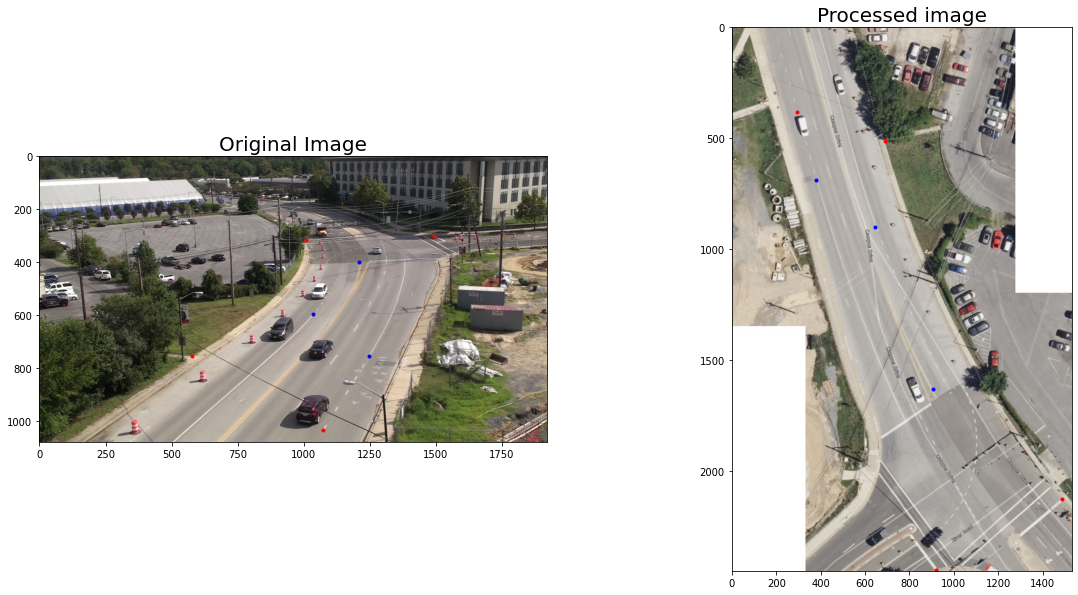

In [5]:
map_file = './images/SkyView.jpg'
ret = displayPoints(SRC, M, './images/frame_view_2.jpg', map_file)

In [ ]:
ret = displayPoints(DST, Minv, map_file,  './images/frame_view1.jpg')

# Lane masks

In [ ]:
MASK_PATH = './images/Mask.png'

In [ ]:


mask = (255*plt.imread(MASK_PATH)).astype(int)
if (len(mask.shape) == 3) and (mask.shape[2] > 1):
    #mask = np.sum(mask, axis=2)
    mask = mask[:, :, 0]
plt.imshow(mask, cmap='gray')
unique = np.unique(mask, return_counts=True)
unique

In [ ]:
order = np.argsort(unique[1])[::-1]
unique_sorted = (unique[0][order], unique[1][order])
print (unique_sorted)

In [ ]:
mask[~np.isin(mask, (10, 20, 30, 40, 50))] = 0
plt.imshow(mask, cmap='gray')
unique = np.unique(mask, return_counts=True)
unique

In [ ]:
tmp = mask.copy()
tmp[tmp!=50] = 0
plt.imshow(tmp, cmap='gray')

In [ ]:
for i in np.unique(mask)[1:]:
    f = plt.figure()
    img = i * (mask == i)
    plt.imshow(img, cmap='gray')
    plt.title(i)